In [1]:
import praw
import pandas as pd
from praw.models import MoreComments
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np


# use your own access to the reddit API  https://praw.readthedocs.io/en/latest/getting_started/quick_start.html#get-a-reddit-instance
reddit = praw.Reddit(client_id='#######', client_secret='#######', user_agent='#######')

Text(0.5, 1.0, 'r/pics')

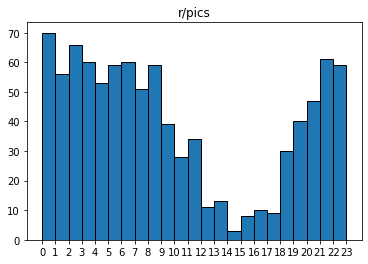

In [2]:
posts = []
#ml_subreddit = reddit.subreddit('MachineLearning')
subr='pics'#'Jokes'
ml_subreddit = reddit.subreddit(subr)
for post in ml_subreddit.top("all",limit=1000):
    dt=datetime.utcfromtimestamp(post.created)
    date=dt.date()
    time=dt.time()
    #now = datetime.now()
    minutes_since_midnight = (dt - dt.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()/60.0
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,date,time,minutes_since_midnight])
    
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','date','time','minutes'])

bins= range(0,24)
plt.hist(posts['minutes']/60, bins=bins, edgecolor="k")
plt.xticks(bins)
plt.title('r/'+subr)


Text(0.5, 0, 'hour of day posted [utc]')

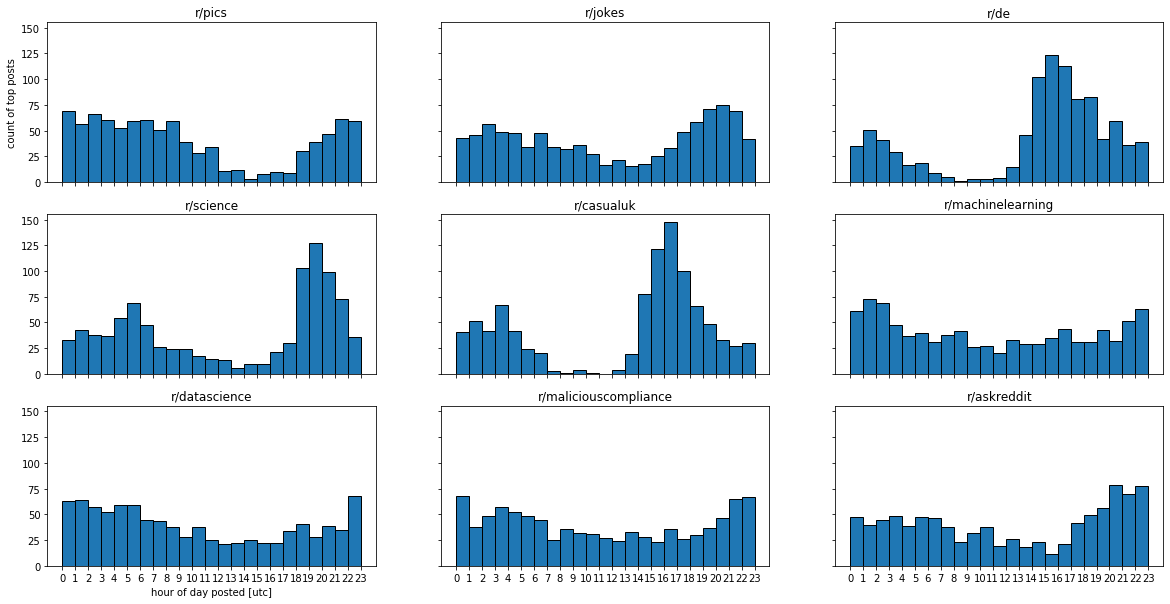

In [16]:
list=['pics','jokes','de','science','casualuk','machinelearning','datascience','maliciouscompliance','askreddit']
ln=int(np.sqrt(len(list)))
fig, axs = plt.subplots(ln, ln,figsize=(20, 10),sharex=True,sharey=True)

axz=axs.reshape(-1)


for i,subr in enumerate(list):
    posts = []
    #ml_subreddit = reddit.subreddit('MachineLearning')
    #subr='pics'#'Jokes'
    ml_subreddit = reddit.subreddit(subr)
    for post in ml_subreddit.top("all",limit=1000):
        dt=datetime.utcfromtimestamp(post.created)
        date=dt.date()
        time=dt.time()
        #now = datetime.now()
        minutes_since_midnight = (dt - dt.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()/60.0
        posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,date,time,minutes_since_midnight])

    posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','date','time','minutes'])

    bins= range(0,24)
    #f=plt.subplots(axs[i])
    #ib=np.base_repr(i,base=ln)
    #print(i,ln,ib)
    
    #axs[ib[0],ib[1]].plot(range(10))
    axz[i].hist(posts['minutes']/60, bins=bins, edgecolor="k")
    axz[i].set_xticks(bins)
    #axz[i].set_ylabel('count of top posts')
    #axz[i].set_xlabel('hour of day posted [utc]')
    #print(subr)
    axz[i].set_title('r/'+subr)
    
axz[0].set_ylabel('count of top posts')
axz[6].set_xlabel('hour of day posted [utc]')

Text(0.5, 0, 'hour of day posted [utc]')

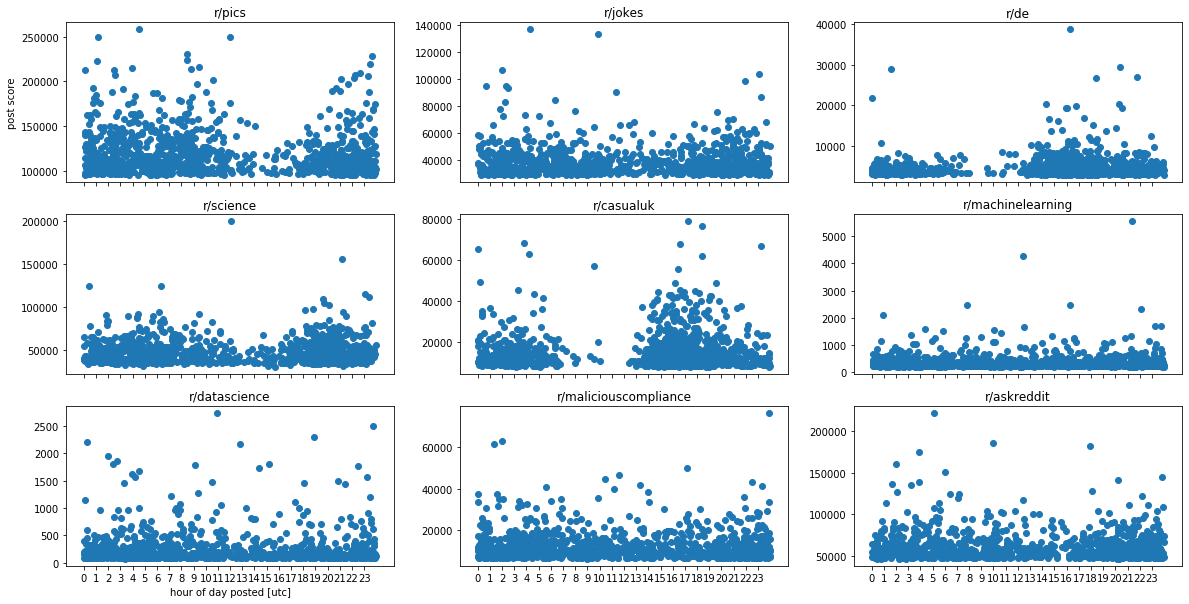

In [19]:
list=['pics','jokes','de','science','casualuk','machinelearning','datascience','maliciouscompliance','askreddit']
ln=int(np.sqrt(len(list)))
fig, axs = plt.subplots(ln, ln,figsize=(20, 10),sharex=True)

axz=axs.reshape(-1)


for i,subr in enumerate(list):
    posts = []
    #ml_subreddit = reddit.subreddit('MachineLearning')
    #subr='pics'#'Jokes'
    ml_subreddit = reddit.subreddit(subr)
    for post in ml_subreddit.top("all",limit=1000):
        dt=datetime.utcfromtimestamp(post.created)
        date=dt.date()
        time=dt.time()
        #now = datetime.now()
        minutes_since_midnight = (dt - dt.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()/60.0
        posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,date,time,minutes_since_midnight])

    posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','date','time','minutes'])

    bins= range(0,24)
    #f=plt.subplots(axs[i])
    #ib=np.base_repr(i,base=ln)
    #print(i,ln,ib)
    
    #axs[ib[0],ib[1]].plot(range(10))
    axz[i].scatter(posts['minutes']/60,posts['score'])
    axz[i].set_xticks(bins)
    #axz[i].set_ylabel('count of top posts')
    #axz[i].set_xlabel('hour of day posted [utc]')
    #print(subr)
    axz[i].set_title('r/'+subr)
    
axz[0].set_ylabel('post score')
axz[6].set_xlabel('hour of day posted [utc]')

In [20]:
posts = []
#ml_subreddit = reddit.subreddit('MachineLearning')
subr='idontworkherelady'#'Jokes'
ml_subreddit = reddit.subreddit(subr)
for post in ml_subreddit.top("all",limit=1000):
    dt=datetime.utcfromtimestamp(post.created)
    date=dt.date()
    time=dt.time()
    #now = datetime.now()
    minutes_since_midnight = (dt - dt.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()/60.0
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,date,time,minutes_since_midnight])
    
posts_ml = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','date','time','minutes'])

In [22]:
from textgenrnn import textgenrnn
bodies = posts_ml['body'].str.replace(
    '(-[0-9]+)', '').str.capitalize().unique().tolist()
textgen = textgenrnn(name=subr)
textgen.train_on_texts(bodies, max_length=200, num_epochs=100,  gen_epochs=20,
                       new_model=True, rnn_size=16, rnn_layers=4, dropout=0.5)

ModuleNotFoundError: No module named 'textgenrnn'

In [3]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier

nltk.download('twitter_samples')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

import re, string, random

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

if __name__ == "__main__":

    positive_tweets = twitter_samples.strings('positive_tweets.json')
    negative_tweets = twitter_samples.strings('negative_tweets.json')
    text = twitter_samples.strings('tweets.20150430-223406.json')
    tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

    stop_words = stopwords.words('english')

    positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
    negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

    positive_cleaned_tokens_list = []
    negative_cleaned_tokens_list = []

    for tokens in positive_tweet_tokens:
        positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    for tokens in negative_tweet_tokens:
        negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    all_pos_words = get_all_words(positive_cleaned_tokens_list)

    freq_dist_pos = FreqDist(all_pos_words)
    print(freq_dist_pos.most_common(10))

    positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
    negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

    positive_dataset = [(tweet_dict, "Positive")
                         for tweet_dict in positive_tokens_for_model]

    negative_dataset = [(tweet_dict, "Negative")
                         for tweet_dict in negative_tokens_for_model]

    dataset = positive_dataset + negative_dataset

    random.shuffle(dataset)

    train_data = dataset[:7000]
    test_data = dataset[7000:]

    classifier = NaiveBayesClassifier.train(train_data)

    print("Accuracy is:", classify.accuracy(classifier, test_data))

    print(classifier.show_most_informative_features(10))

    custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."

    custom_tokens = remove_noise(word_tokenize(custom_tweet))

    print(custom_tweet, classifier.classify(dict([token, True] for token in custom_tokens)))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]
Accuracy is: 0.996
Most Informative Features
                      :( = True           Negati : Positi =   2078.0 : 1.0
                follower = True           Positi : Negati =     39.1 : 1.0
                     bam = True           Positi : Negati =     24.0 : 1.0
                     sad = True           Negati : Positi =     21.6 : 1.0
               community = True           Positi : Negati =     15.5 : 1.0
                followed = True           Negati : Positi =     15.2 : 1.0
                    blog = True           Positi : Negati =     14.8 : 1.0
                   didnt = True           Negati : Positi =     13.9 : 1.0
           unfortunately = True           Negati : Positi =     12.5 : 1.0
                       😭 = True           Negati : Positi =     12.5 : 1.0
None
I ordered just once from TerribleCo, they screwed 

In [5]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alice\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
from textblob import TextBlob
#TextBlob(sentence).sentiment

In [7]:
posts = []
#ml_subreddit = reddit.subreddit('MachineLearning')
subr='idontworkherelady'#'Jokes'
ml_subreddit = reddit.subreddit(subr)
for post in ml_subreddit.top("all",limit=1000):
    dt=datetime.utcfromtimestamp(post.created)
    date=dt.date()
    time=dt.time()
    #now = datetime.now()
    minutes_since_midnight = (dt - dt.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()/60.0
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,date,time,minutes_since_midnight])
    
posts_ml = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','date','time','minutes'])

In [36]:
score=[]
score2=[]
pos=[]
neu=[]
neg=[]
compound=[]
for i,post in enumerate(posts_ml.body):
    #custom_tokens = remove_noise(word_tokenize(post))
    s=sid.polarity_scores(post)
    #s2=TextBlob(post).sentiment
    #print(s('compound'))
    score.append(sid.polarity_scores(post))
    pos.append(sid.polarity_scores(post)['pos'])
    neu.append(sid.polarity_scores(post)['neu'])
    neg.append(sid.polarity_scores(post)['neg'])
    compound.append(sid.polarity_scores(post)['compound'])
    score2.append(TextBlob(post).sentiment)
    
    #print(custom_tweet, sid.polarity_scores(comment),)
    #print(custom_tweet, sid.polarity_scores(comment))
    
    #print(i,comment)
posts_ml['score']=score
posts_ml['pos']=pos
posts_ml['neu']=neu
posts_ml['neg']=neg
posts_ml['compound']=compound
posts_ml['score2']=score2

In [38]:
#posts_ml['pos'].mean()
#posts_ml['neu'].mean()
#posts_ml['neg'].mean()
posts_ml
positive_posts=sum(posts_ml['compound'].pct_change().fillna(0) > 0)
negative_posts=sum(posts_ml['compound'].pct_change().fillna(0) < 0)
print(positive_posts,negative_posts)

245 746


TypeError: list indices must be integers or slices, not str

0 jokes
1 askreddit
2 maliciouscompliance
3 idontworkherelady


IndexError: index 6 is out of bounds for axis 0 with size 4

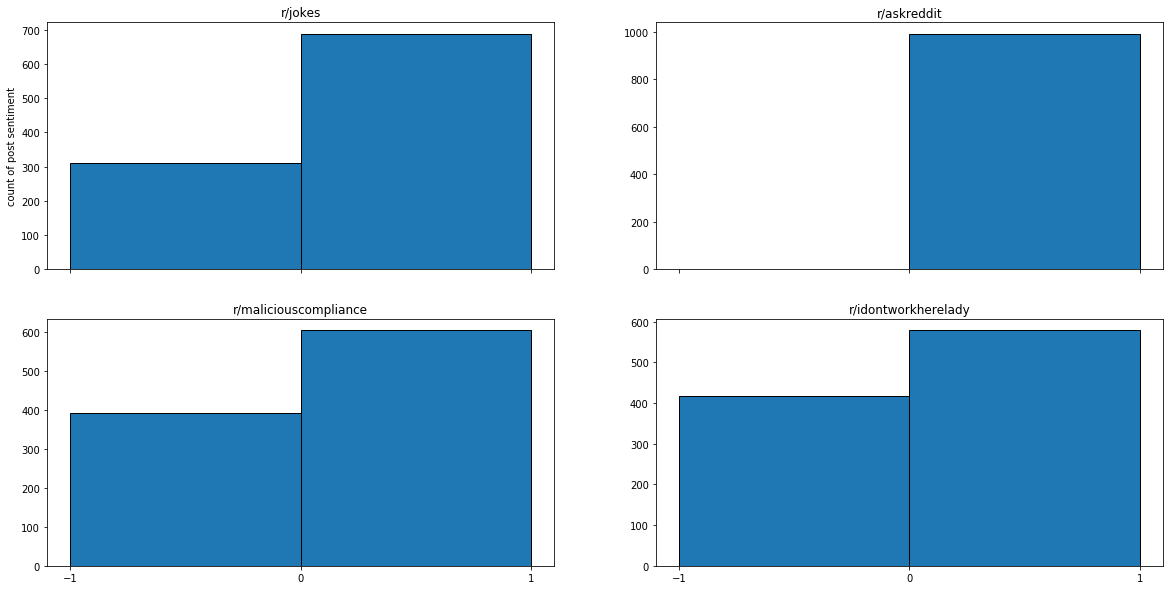

In [49]:
list=['jokes','askreddit','maliciouscompliance','idontworkherelady']


ln=int(np.sqrt(len(list)))
fig, axs = plt.subplots(ln, ln,figsize=(20, 10),sharex=True)

axz=axs.reshape(-1)


for i,subr in enumerate(list):
    print(i,subr)
    posts = []

    #subr='idontworkherelady'#'Jokes'
    ml_subreddit = reddit.subreddit(subr)
    for post in ml_subreddit.top("all",limit=1000):
        dt=datetime.utcfromtimestamp(post.created)
        date=dt.date()
        time=dt.time()
        #now = datetime.now()
        minutes_since_midnight = (dt - dt.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()/60.0
        posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,date,time,minutes_since_midnight])

    posts_ml = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','date','time','minutes'])

    compound=[]
    for j,post in enumerate(posts_ml.body):
        compound.append(sid.polarity_scores(post)['compound'])
        
    posts_ml['compound']=compound
    #print(compound)

    bins= range(-1,2)
    #f=plt.subplots(axs[i])
    #ib=np.base_repr(i,base=ln)
    #print(i,ln,ib)
    
    #axs[ib[0],ib[1]].plot(range(10))
    axz[i].hist(posts_ml['compound'], bins=bins, edgecolor="k")
    axz[i].set_xticks(bins)
    #axz[i].set_ylabel('count of top posts')
    #axz[i].set_xlabel('hour of day posted [utc]')
    #print(subr)
    axz[i].set_title('r/'+subr)
    
axz[0].set_ylabel('count of post sentiment')
axz[6].set_xlabel('negative/postive')